# Requirements Python
**Python Version: 3.9**

**Library Python**
| **Package**                  | **Version**  |
|------------------------------|--------------|
| matplotlib                   | 3.9.2        |
| numpy                        | 1.24.3       |
| pandas                       | 2.2.3        |
| pip                          | 24.3.1       |
| seaborn                      | 0.13.2       |
| scipy                        | 1.10.1       |
| nltk                         | 3.7          |
| wordcloud                    | 1.8.2        |
| scikit-learn                 | 1.2.2        |
| regex                        | 2023.9.0     |


# Library & Load Dataset Nutrition

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from wordcloud import WordCloud

# Download required NLTK data
nltk.download('punkt')

# Load dataset
df = pd.read_csv(r'..\data\combine-dataset.csv')
df

[nltk_data] Error loading punkt: <urlopen error [Errno 2] No such file
[nltk_data]     or directory>


,Name,Calories,Protein(g),Fat(g),SaturatedFat(g),Cholesterol(mg),Sodium(mg),Carbohydrate(g),Fiber(g),Sugar(g)
0,Cornstarch,381.0,0.26,0.05,0.0,0.0,9.0,91.27,0.9,0.00
1,"Nuts, pecans",691.0,9.17,71.97,6.2,0.0,0.0,13.86,9.6,3.97
2,"Eggplant, raw",25.0,0.98,0.18,0.0,0.0,2.0,5.88,3.0,3.53
3,"Teff, uncooked",367.0,13.30,2.38,0.4,0.0,12.0,73.13,8.0,1.84
4,"Sherbet, orange",144.0,1.10,2.00,1.2,1.0,46.0,30.40,1.3,24.32
...,...,...,...,...,...,...,...,...,...,...
530090,Meg's Fresh Ginger Gingerbread,316.6,3.90,12.50,7.6,54.4,278.2,48.50,0.8,22.80
530091,Roast Prime Rib au Poivre with Mixed Peppercorns,2063.4,117.00,172.40,71.4,433.8,766.3,3.20,0.7,0.10
530092,Kirshwasser Ice Cream,1271.3,12.80,117.20,72.6,470.9,192.5,33.90,0.0,17.30
530093,Quick & Easy Asian Cucumber Salmon Rolls,16.1,2.40,0.60,0.1,2.9,100.5,0.30,0.0,0.10


# Data Cleaning 

In [2]:
# Daftar batas maksimum nutrisi
max_Calories = 2650
max_daily_fat = 100
max_daily_Saturatedfat = 13
max_daily_Cholesterol = 300
max_daily_Sodium = 2300
max_daily_Carbohydrate = 325
max_daily_Fiber = 40
max_daily_Sugar = 40
max_daily_Protein = 200

max_list = [
    max_Calories,
    max_daily_fat,
    max_daily_Saturatedfat,
    max_daily_Cholesterol,
    max_daily_Sodium,
    max_daily_Carbohydrate,
    max_daily_Fiber,
    max_daily_Sugar,
    max_daily_Protein
]

# Pastikan dataset memiliki kolom nutrisi sesuai
nutritional_columns = [
    'Calories', 'Fat(g)', 'SaturatedFat(g)', 'Cholesterol(mg)', 'Sodium(mg)',
    'Carbohydrate(g)', 'Fiber(g)', 'Sugar(g)', 'Protein(g)'
]

# Filter dataset berdasarkan batas maksimum
df = df.copy()
for column, maximum in zip(nutritional_columns, max_list):
    if column in df.columns:
        df = df[df[column] < maximum]

In [3]:
# Membagi dataset menjadi setengah (50%)
df = df.sample(frac=0.5, random_state=42)  # 'frac=0.5' artinya 50% dari dataset

In [4]:
# Basic info and statistics of the dataset
df.info()

# Check for missing values
df.isnull().sum()

# Display basic statistics of the numeric columns
df.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 191336 entries, 424959 to 164536
Data columns (total 10 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Name             191336 non-null  object 
 1   Calories         191336 non-null  float64
 2   Protein(g)       191336 non-null  float64
 3   Fat(g)           191336 non-null  float64
 4   SaturatedFat(g)  191336 non-null  float64
 5   Cholesterol(mg)  191336 non-null  float64
 6   Sodium(mg)       191336 non-null  float64
 7   Carbohydrate(g)  191336 non-null  float64
 8   Fiber(g)         191336 non-null  float64
 9   Sugar(g)         191336 non-null  float64
dtypes: float64(9), object(1)
memory usage: 16.1+ MB


,Calories,Protein(g),Fat(g),SaturatedFat(g),Cholesterol(mg),Sodium(mg),Carbohydrate(g),Fiber(g),Sugar(g)
count,191336.000000,191336.000000,191336.000000,191336.000000,191336.000000,191336.000000,191336.000000,191336.000000,191336.000000
mean,269.046037,12.397147,12.012922,3.986572,45.099885,412.555338,27.975205,3.013390,8.623376
std,180.696018,13.456474,10.515655,3.492545,54.676824,429.118386,24.280571,3.649161,9.143150
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,136.400000,2.700000,4.200000,1.000000,0.100000,90.500000,10.400000,0.700000,2.000000
50%,237.500000,6.800000,9.700000,3.000000,25.300000,268.500000,22.700000,1.900000,5.200000
75%,365.700000,19.000000,17.400000,6.400000,70.400000,599.800000,39.200000,4.000000,12.200000
max,2595.100000,162.300000,99.980000,12.900000,299.800000,2299.000000,323.400000,39.700000,39.900000


## Visualize Missing Values

### Check Data Missing Values

Terdapat Data Yang Hilang Sebanyak  0 Kolom, Dengan Nama Kolom : 
Series([], dtype: int64)


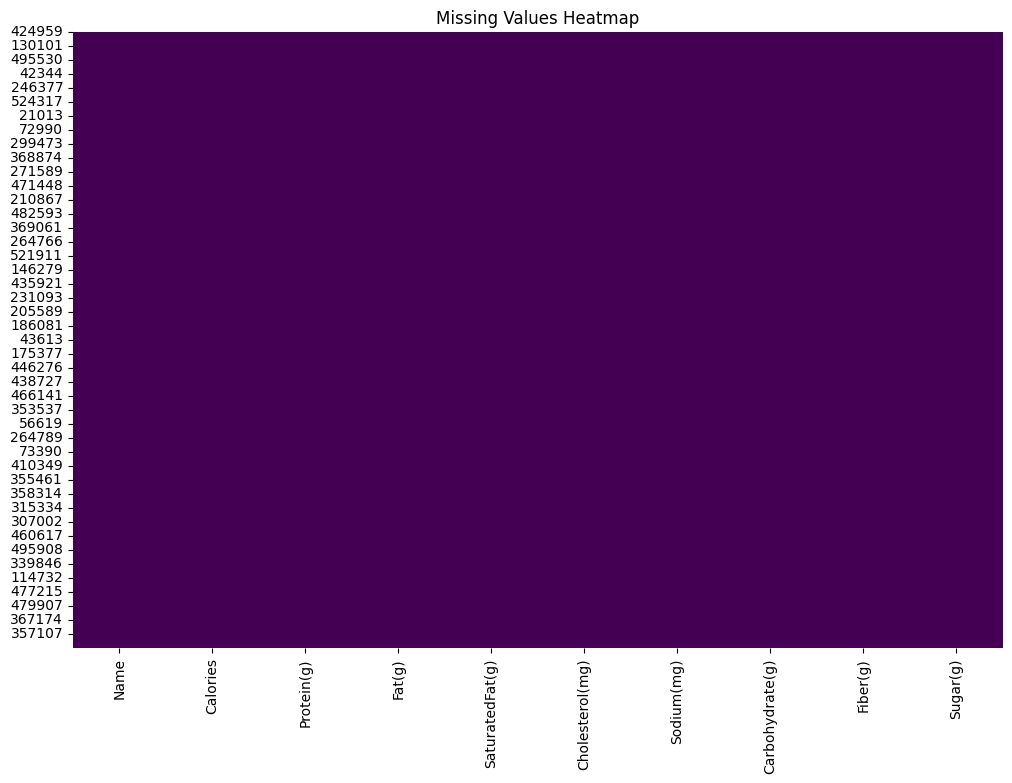

In [5]:
df_missing_values = df.isnull().sum()
df_missing_columns = df_missing_values[df_missing_values > 0]
print("Terdapat Data Yang Hilang Sebanyak ",df_missing_columns.count(), "Kolom, Dengan Nama Kolom : ")
print(df_missing_columns)
plt.figure(figsize=(12, 8))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values Heatmap")
plt.show()

## Distribution of Key Nutrients (Histogram)

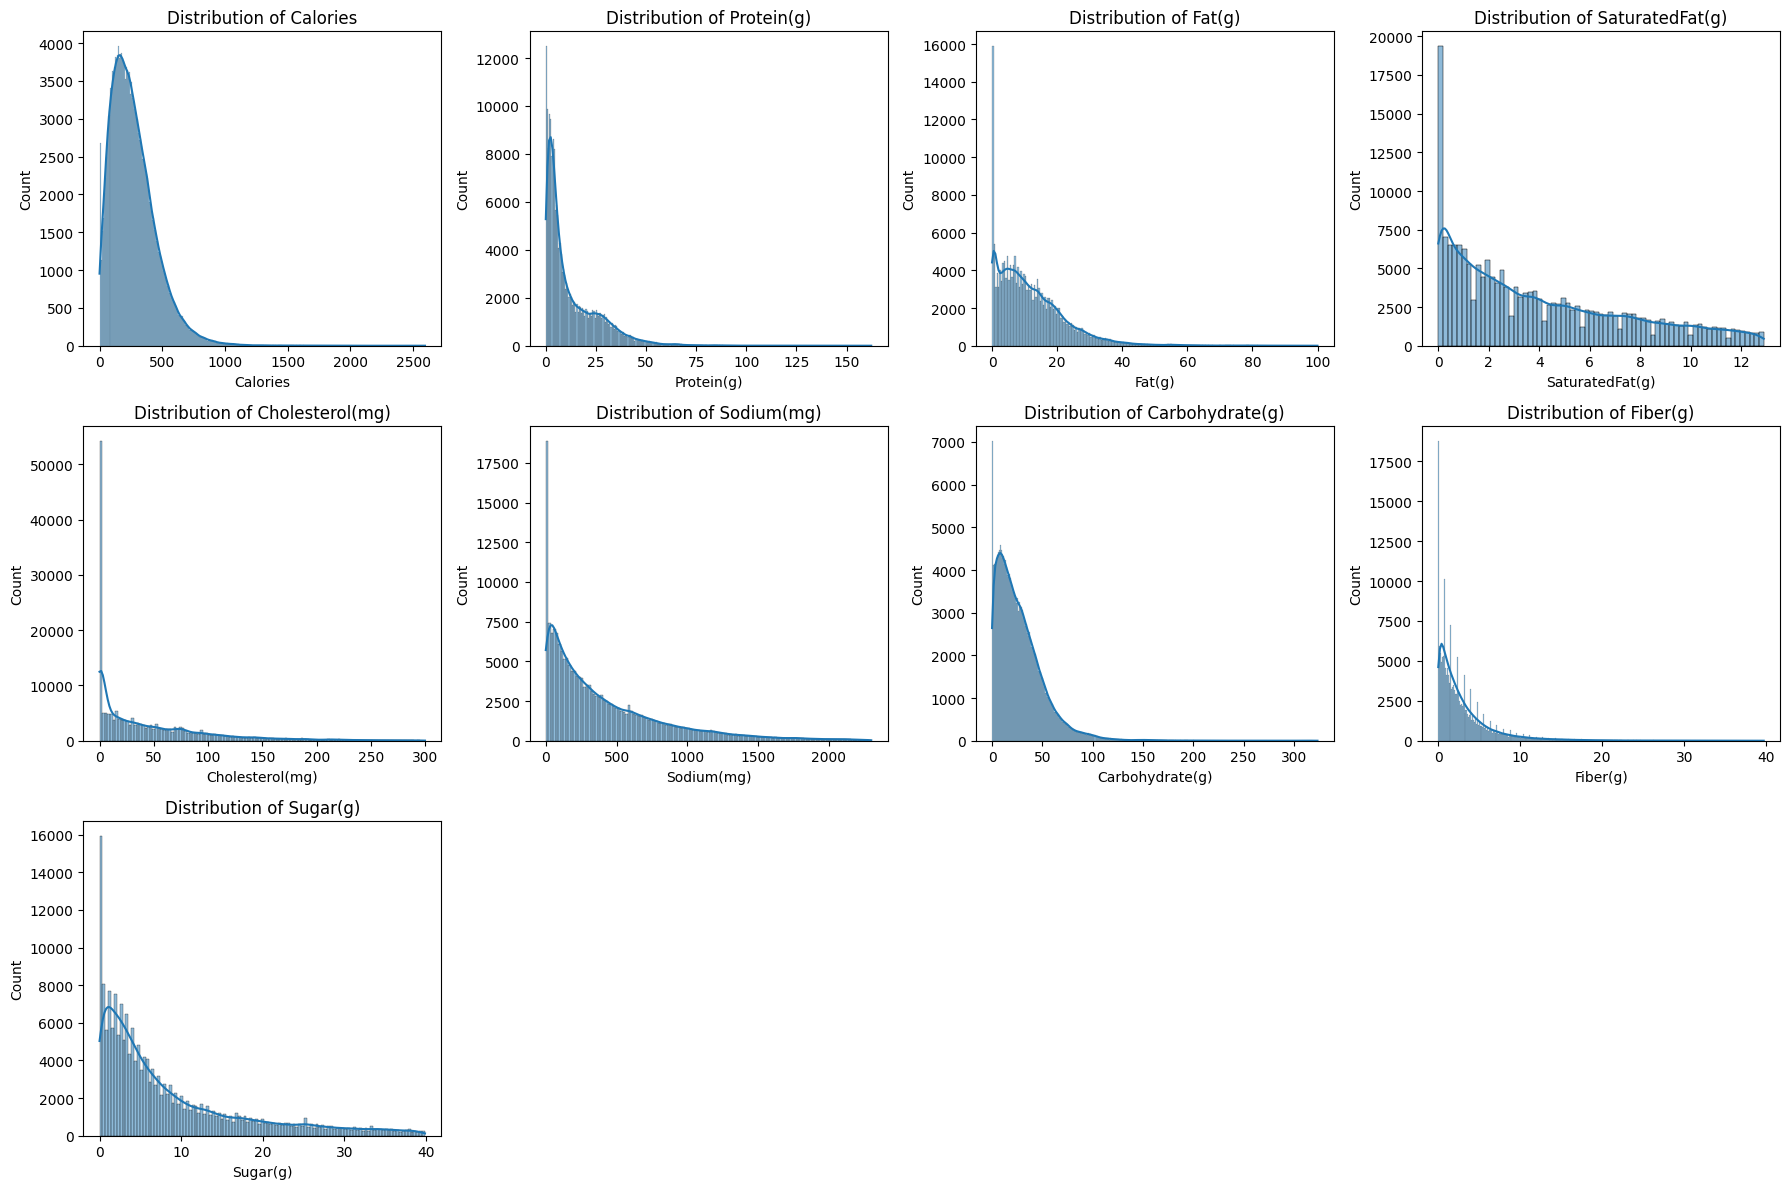

In [6]:
# List of key nutrient columns for distribution analysis
selected_columns = ['Calories', 'Protein(g)', 'Fat(g)', 'SaturatedFat(g)', 
                    'Cholesterol(mg)', 'Sodium(mg)', 'Carbohydrate(g)', 'Fiber(g)', 'Sugar(g)']

# Set up a larger grid to visualize these columns
rows = (len(selected_columns) // 4) + 1

plt.figure(figsize=(18, 4 * rows))

for i, col in enumerate(selected_columns, 1):
    plt.subplot(rows, 4, i)
    sns.histplot(df[col].dropna(), kde=True)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.tight_layout()

plt.show()

## Boxplot to Detect Outliers

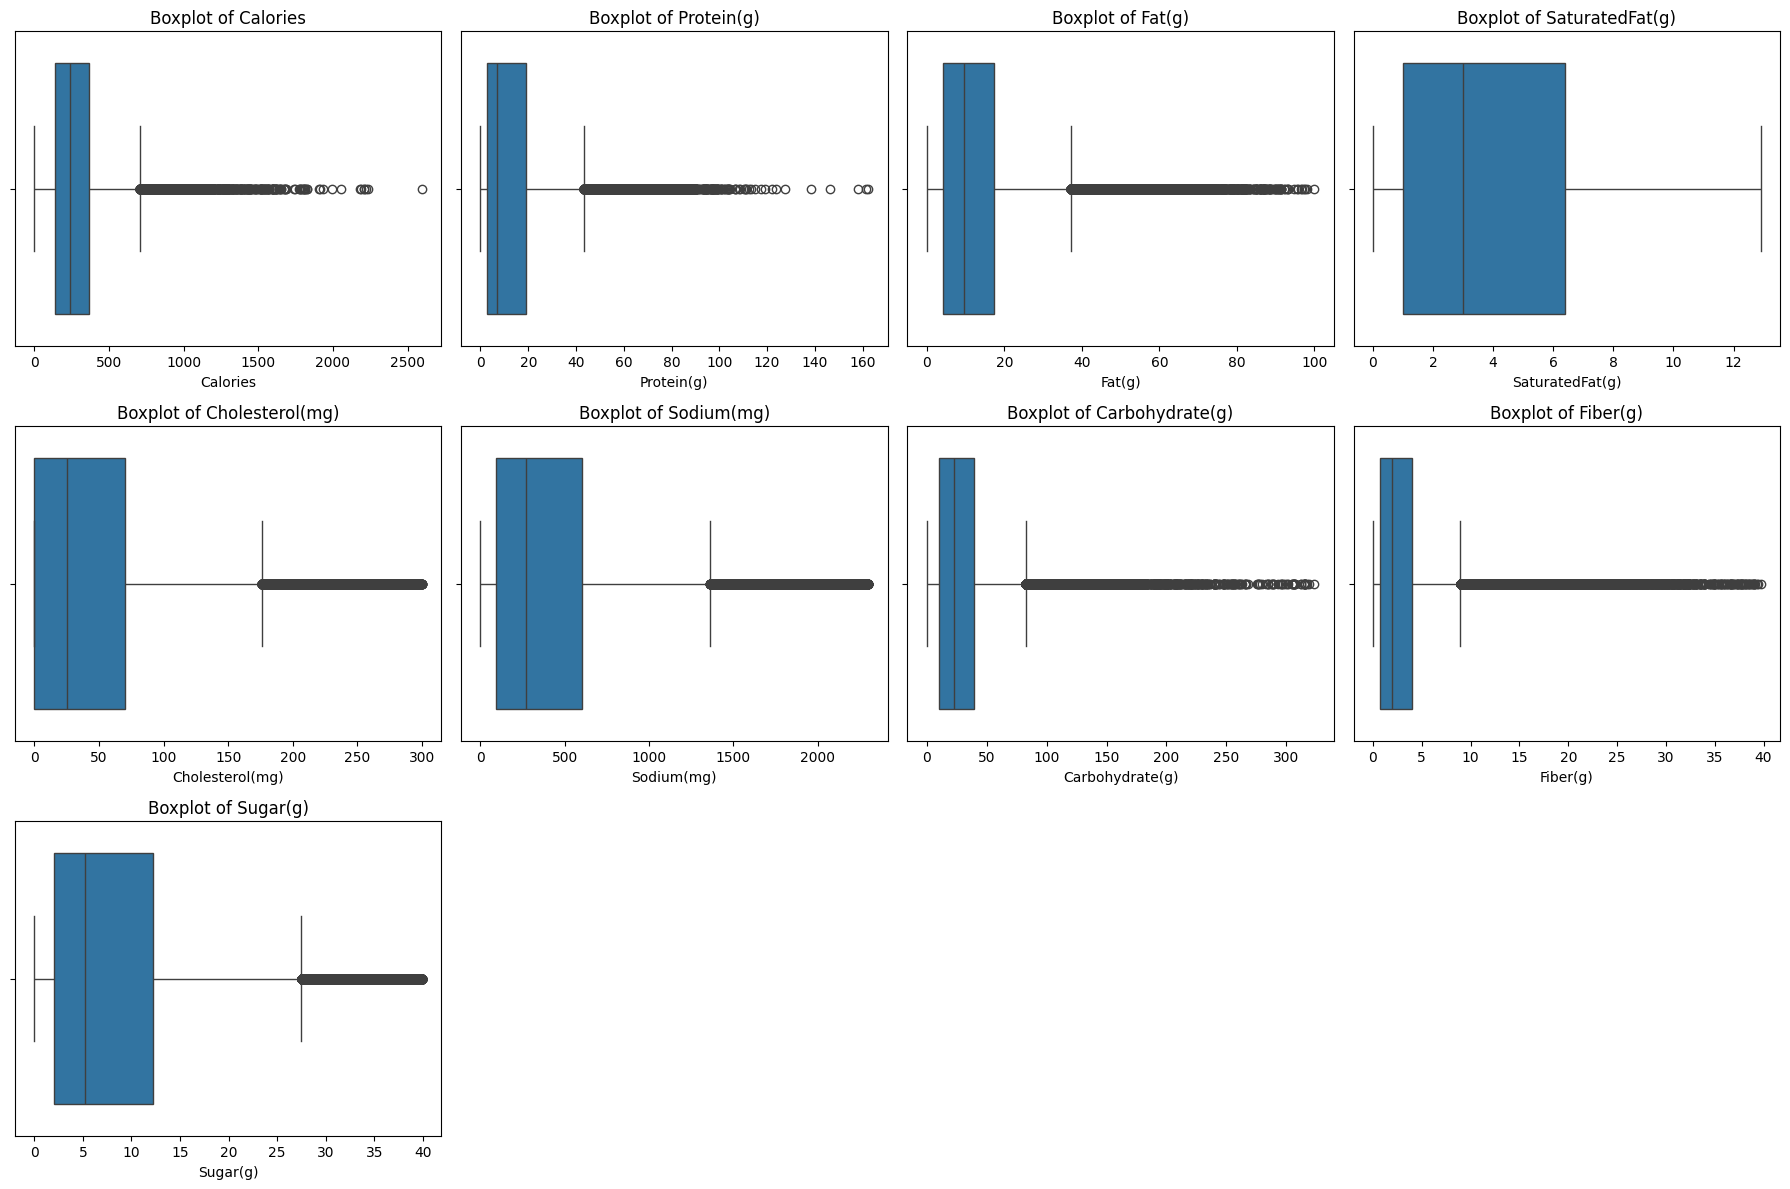

In [7]:
# Boxplot to detect outliers
plt.figure(figsize=(18, 4 * rows))

for i, col in enumerate(selected_columns, 1):
    plt.subplot(rows, 4, i)
    sns.boxplot(x=df[col].dropna())
    plt.title(f"Boxplot of {col}")
    plt.xlabel(col)
    plt.tight_layout()

plt.show()


## Correlation Heatmap

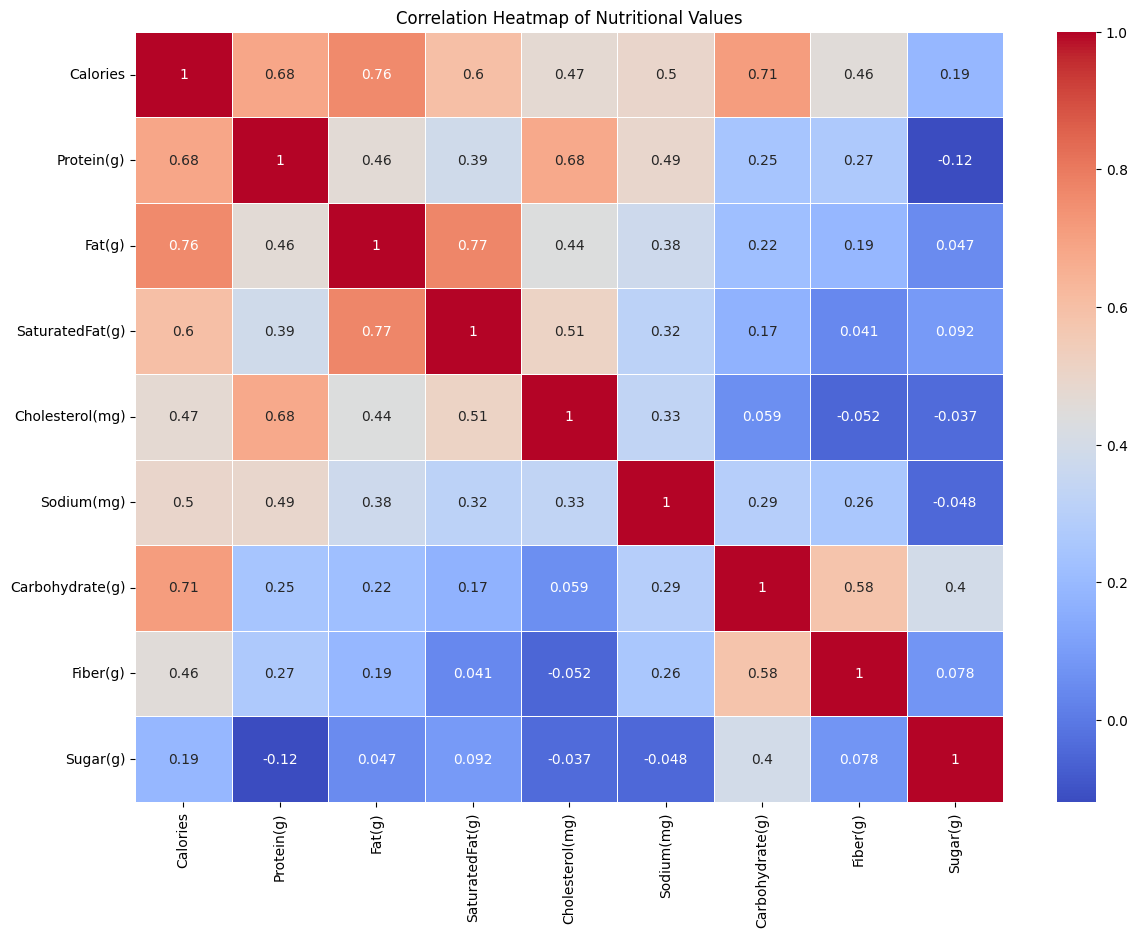

In [8]:
plt.figure(figsize=(14, 10))
correlation_matrix = df[selected_columns].corr()

# Generate heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap of Nutritional Values")
plt.show()

## Comparison of Macronutrients

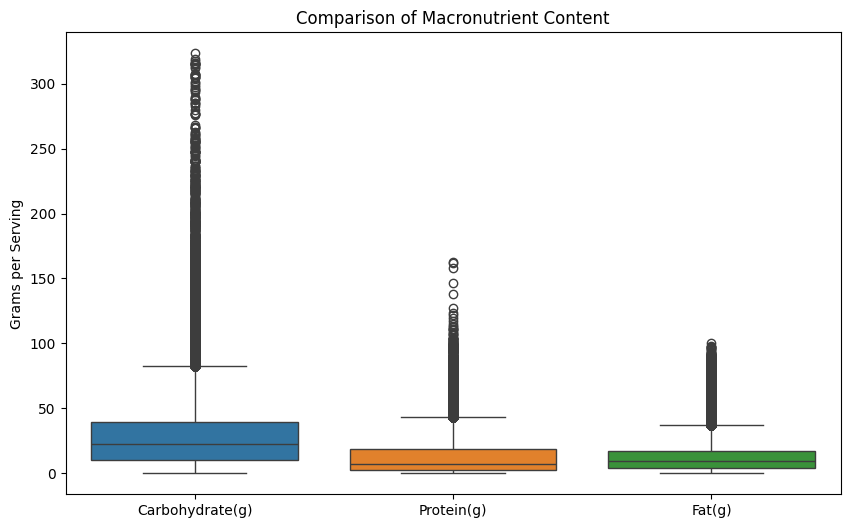

In [9]:
macronutrients = ['Carbohydrate(g)', 'Protein(g)', 'Fat(g)']

plt.figure(figsize=(10, 6))
sns.boxplot(data=df[macronutrients])
plt.title("Comparison of Macronutrient Content")
plt.ylabel("Grams per Serving")
plt.show()

## Top High-Protein Foods

C:\Users\HP\AppData\Local\Temp\ipykernel_16184\3589267534.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Protein(g)', y='Name', data=top_protein, palette='viridis')


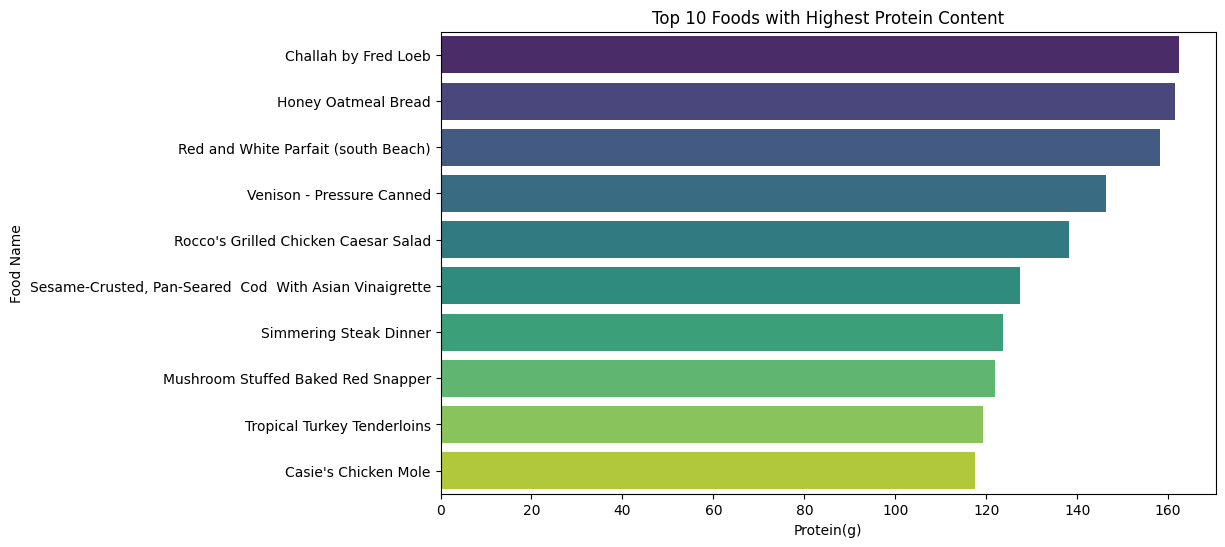

In [10]:
# Sort by protein content and plot top 10 foods
top_protein = df[['Name', 'Protein(g)']].sort_values(by='Protein(g)', ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x='Protein(g)', y='Name', data=top_protein, palette='viridis')
plt.title("Top 10 Foods with Highest Protein Content")
plt.xlabel("Protein(g)")
plt.ylabel("Food Name")
plt.show()

## Top Low-Calorie Foods

C:\Users\HP\AppData\Local\Temp\ipykernel_16184\18014024.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Calories', y='Name', data=low_calories, palette='Blues')


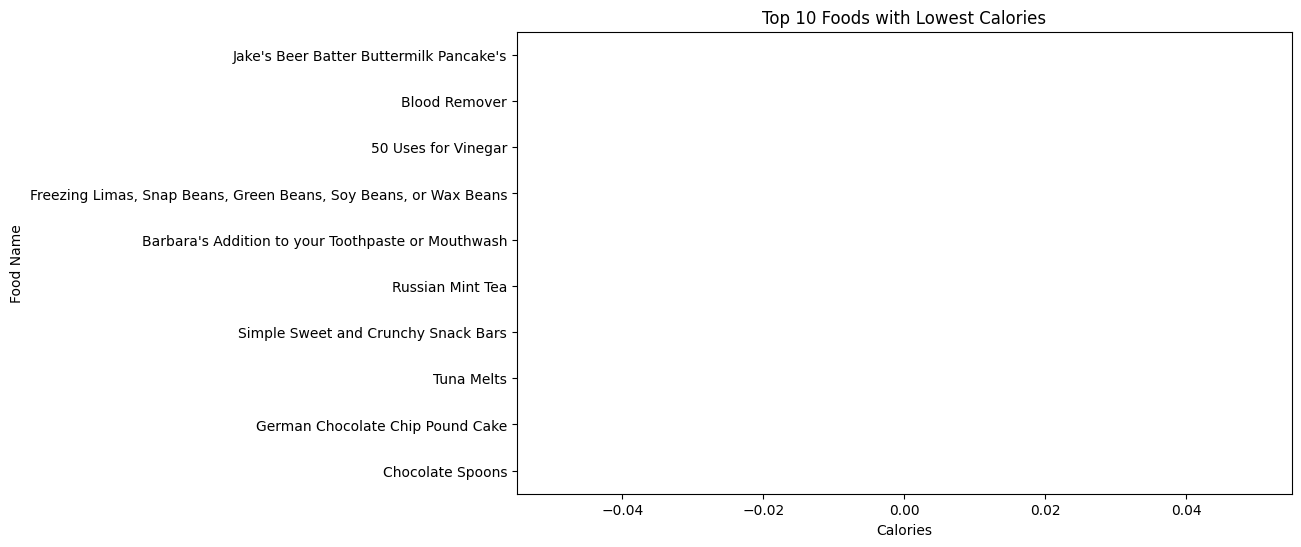

In [11]:
# Sort by calories and plot top 10 lowest-calorie foods
low_calories = df[['Name', 'Calories']].sort_values(by='Calories', ascending=True).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x='Calories', y='Name', data=low_calories, palette='Blues')
plt.title("Top 10 Foods with Lowest Calories")
plt.xlabel("Calories")
plt.ylabel("Food Name")
plt.show()

## Visualize distribution of calories

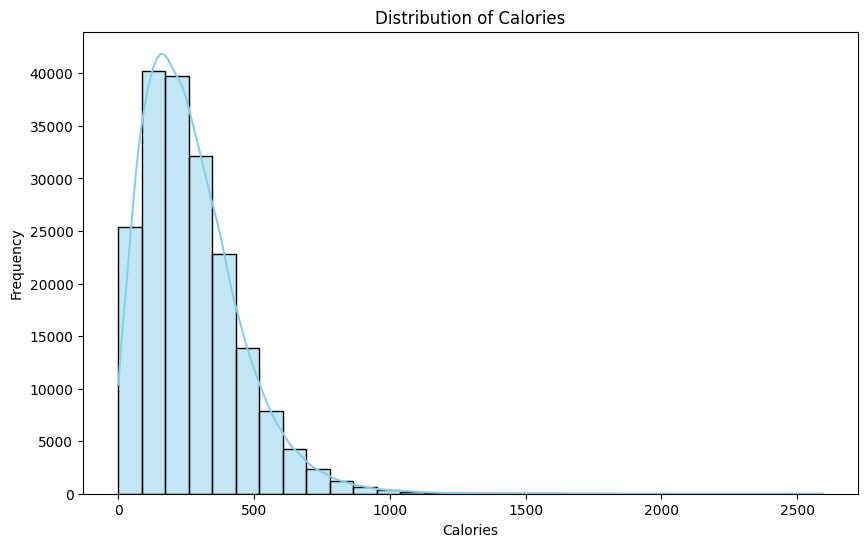

In [12]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Calories'], kde=True, bins=30, color='skyblue')
plt.title('Distribution of Calories')
plt.xlabel('Calories')
plt.ylabel('Frequency')
plt.show()

## Top 10 foods with the highest calories

In [13]:
top_calories = df[['Name', 'Calories']].sort_values(by='Calories', ascending=False).head(10)
print("\nTop 10 Foods with the Highest Calories:")
print(top_calories)


Top 10 Foods with the Highest Calories:
                                        Name  Calories
369434                              Zin-Tini    2595.1
270714                        Habanero Vodka    2231.6
171030                         Berry Aquavit    2223.6
455529                   The Black and Black    2208.9
120446        Andreas Viestad's Mock Aquavit    2208.2
475993                       Randy's Aquavit    2185.9
500883  Copycat Whole Foods Seeduction Bread    2182.7
34424                     Chile Pepper Vodka    2055.0
9940         Spicy Apple and Sultana Muffins    1993.8
10534          Focaccia with Tomato & Cheese    1930.8


## Top 10 foods with the highest protein content

In [14]:
top_protein = df[['Name', 'Protein(g)']].sort_values(by='Protein(g)', ascending=False).head(10)
print("\nTop 10 Foods with the Highest Protein Content:")
print(top_protein)


Top 10 Foods with the Highest Protein Content:
                                                     Name  Protein(g)
125628                               Challah by Fred Loeb       162.3
177280                                Honey Oatmeal Bread       161.6
121764                Red and White Parfait (south Beach)       158.2
57957                           Venison - Pressure Canned       146.4
323451               Rocco's Grilled Chicken Caesar Salad       138.2
139593  Sesame-Crusted, Pan-Seared  Cod  With Asian Vi...       127.4
476298                             Simmering Steak Dinner       123.6
358382                 Mushroom Stuffed Baked Red Snapper       122.0
117220                        Tropical Turkey Tenderloins       119.2
24755                                Casie's Chicken Mole       117.6


## Visualizing nutrient content

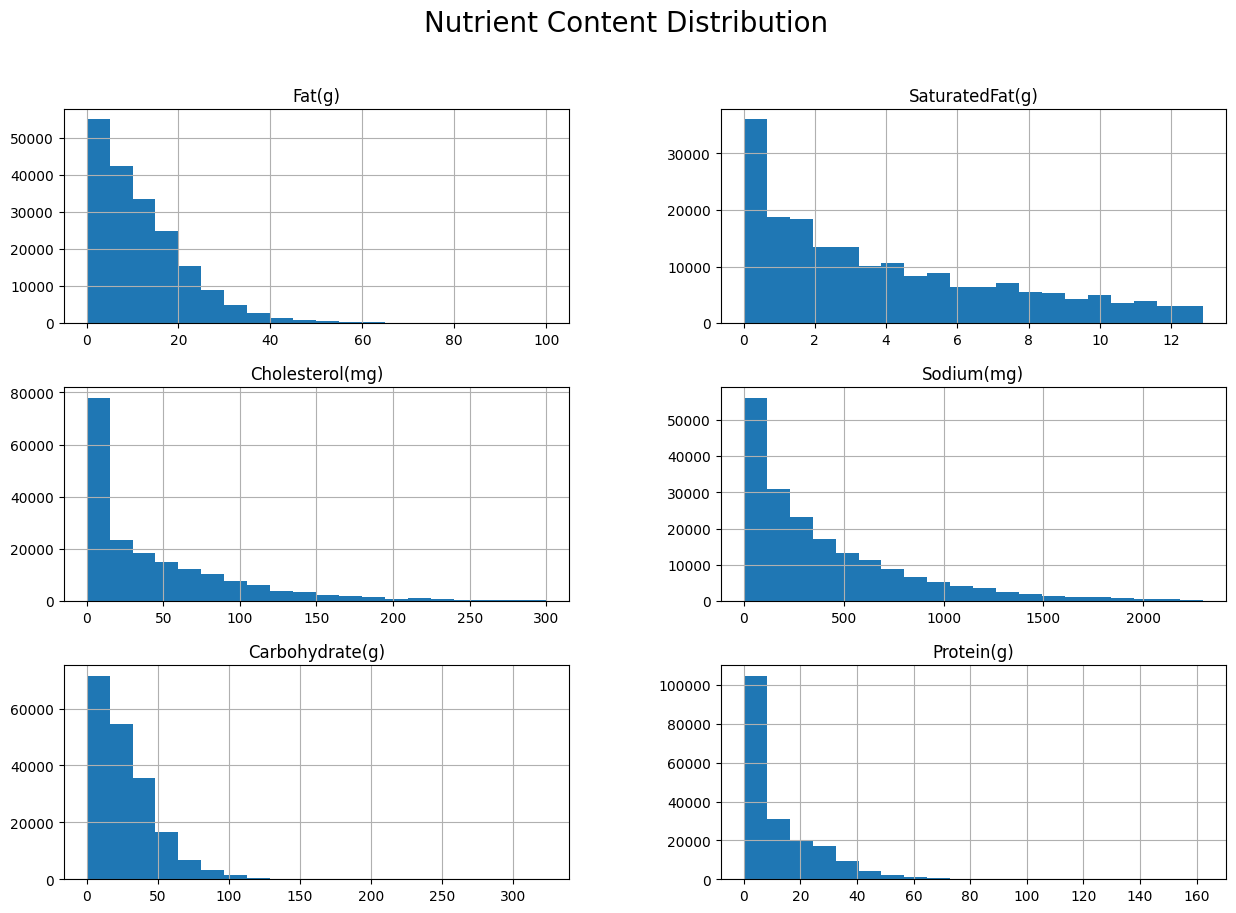

In [15]:
nutrients = ['Fat(g)', 'SaturatedFat(g)', 'Cholesterol(mg)', 'Sodium(mg)', 'Carbohydrate(g)', 'Protein(g)']
df[nutrients].hist(figsize=(15, 10), bins=20)
plt.suptitle('Nutrient Content Distribution', fontsize=20)
plt.show()

## Pairplot to analyze relationships between various nutrients

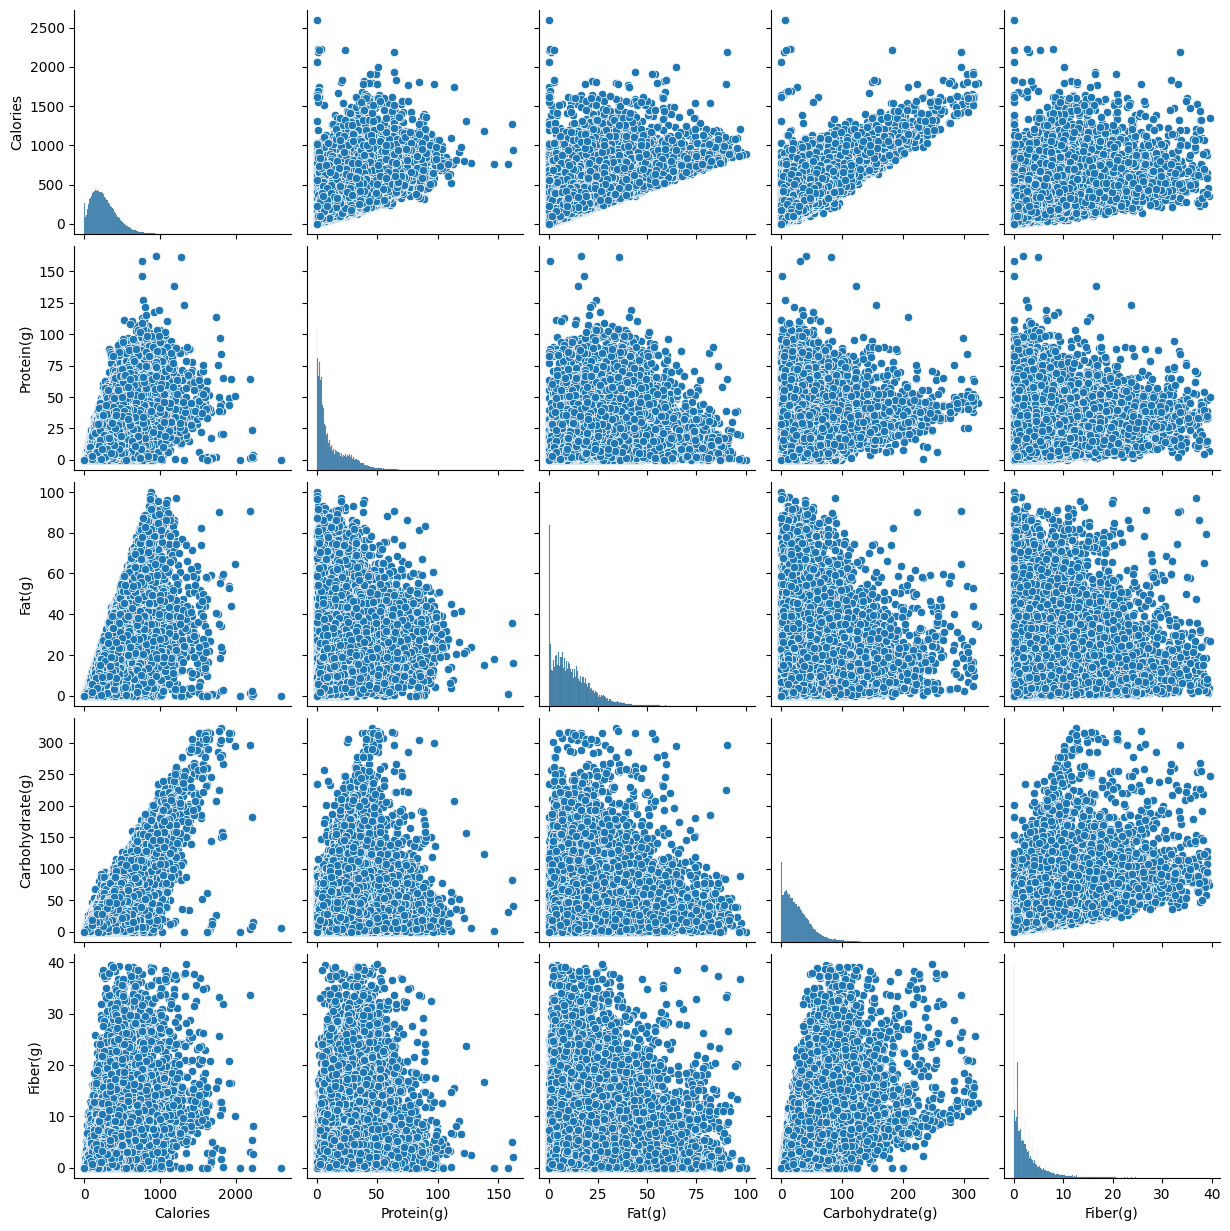

In [16]:
sns.pairplot(df[['Calories', 'Protein(g)', 'Fat(g)', 'Carbohydrate(g)', 'Fiber(g)']])
plt.show()

## Scatter plot of calories vs protein content

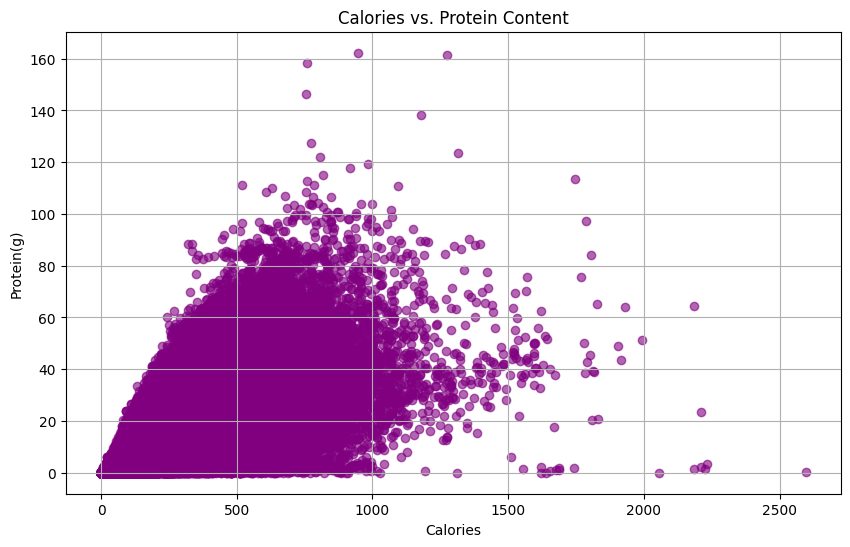

In [17]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Calories'], df['Protein(g)'], alpha=0.6, color='purple')
plt.title('Calories vs. Protein Content')
plt.xlabel('Calories')
plt.ylabel('Protein(g)')
plt.grid(True)
plt.show()

## Stacked Bar Chart: Proportion of Nutrients in Recipes

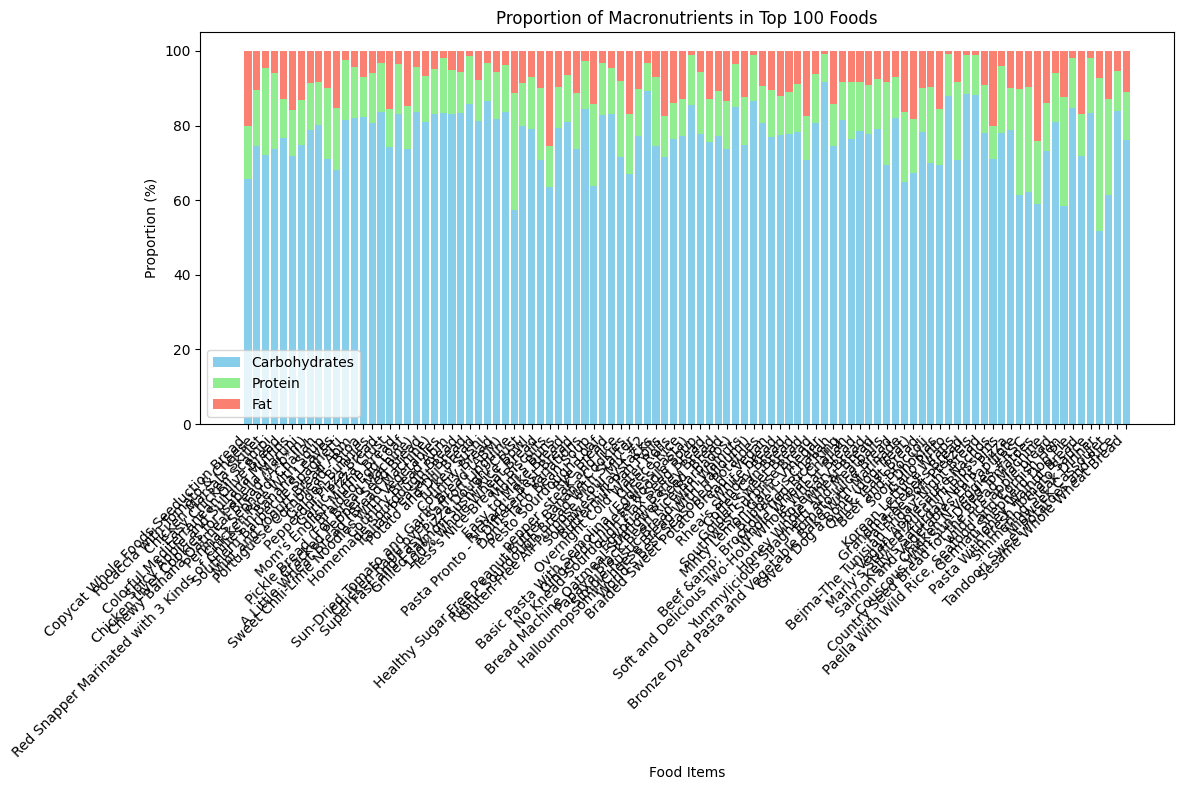

In [18]:
# Select key columns for macronutrients analysis
macronutrient_cols = ['Name', 'Carbohydrate(g)', 'Protein(g)', 'Fat(g)']

# Filter dataset to include only relevant columns
df_macronutrients = df[macronutrient_cols].dropna()

# Normalize the macronutrient values to show proportions
df_macronutrients['total'] = df_macronutrients[['Carbohydrate(g)', 'Protein(g)', 'Fat(g)']].sum(axis=1)
df_macronutrients['carbohydrate (%)'] = (df_macronutrients['Carbohydrate(g)'] / df_macronutrients['total']) * 100
df_macronutrients['protein (%)'] = (df_macronutrients['Protein(g)'] / df_macronutrients['total']) * 100
df_macronutrients['fat (%)'] = (df_macronutrients['Fat(g)'] / df_macronutrients['total']) * 100

# Sort by total content and take top 10 for visualization
top_10 = df_macronutrients.sort_values(by='total', ascending=False).head(100)

# Plotting the stacked bar chart
plt.figure(figsize=(12, 8))
plt.bar(top_10['Name'], top_10['carbohydrate (%)'], label='Carbohydrates', color='skyblue')
plt.bar(top_10['Name'], top_10['protein (%)'], bottom=top_10['carbohydrate (%)'], label='Protein', color='lightgreen')
plt.bar(top_10['Name'], top_10['fat (%)'], 
        bottom=top_10['carbohydrate (%)'] + top_10['protein (%)'], label='Fat', color='salmon')

plt.title("Proportion of Macronutrients in Top 100 Foods")
plt.xlabel("Food Items")
plt.ylabel("Proportion (%)")
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()

## Average Nutrient Composition Across All Recipes

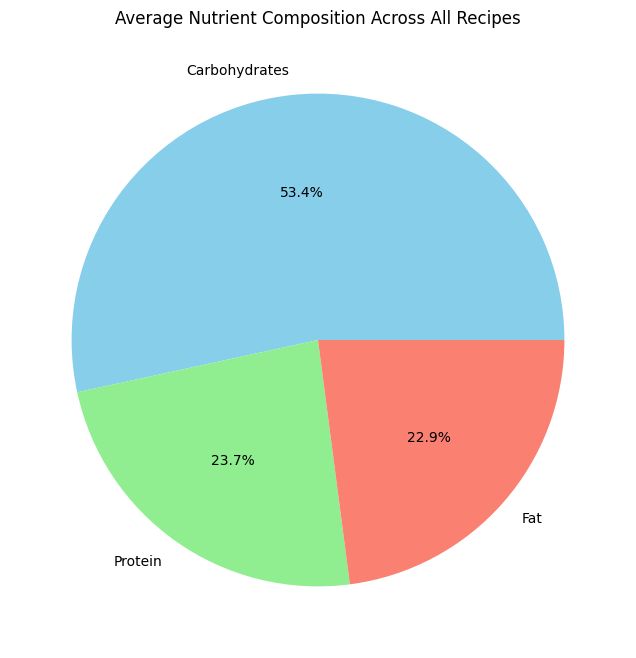

In [19]:
# Calculate average proportion of macronutrients across the entire dataset
avg_carbs = df_macronutrients['Carbohydrate(g)'].sum()
avg_protein = df_macronutrients['Protein(g)'].sum()
avg_fat = df_macronutrients['Fat(g)'].sum()
total = avg_carbs + avg_protein + avg_fat

# Calculate the percentage of each nutrient
macronutrient_distribution = {
    'Carbohydrates': (avg_carbs / total) * 100,
    'Protein': (avg_protein / total) * 100,
    'Fat': (avg_fat / total) * 100
}

# Pie chart visualization
plt.figure(figsize=(8, 8))
plt.pie(macronutrient_distribution.values(), labels=macronutrient_distribution.keys(), 
        autopct='%1.1f%%', colors=['skyblue', 'lightgreen', 'salmon'])
plt.title("Average Nutrient Composition Across All Recipes")
plt.show()

## WordCloud for food names

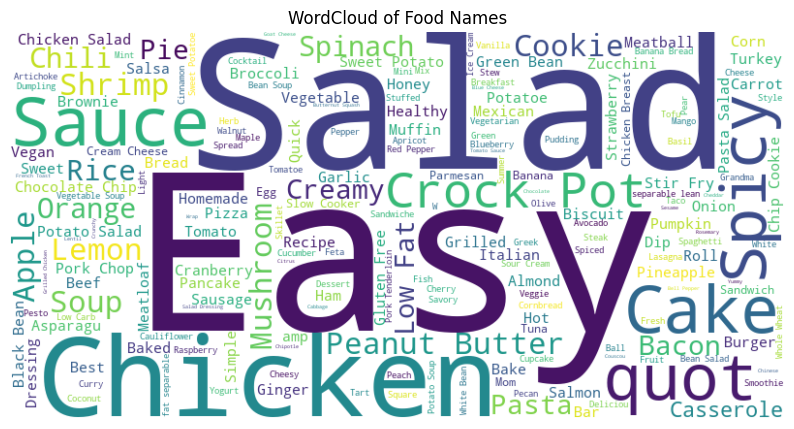

In [20]:
text = " ".join(food for food in df['Name'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud of Food Names')
plt.show()